In [40]:
import prepare_data
import pandas as pd
import xgboost as xgb

In [41]:
id2label, label2id, submission_file, test_ids_final, test_ocr_clean, train_ids_final, train_labels_final, train_set_ocr = prepare_data.read_files()

In [42]:
train_data = pd.read_csv('train_data_modified.csv')
test_data = pd.read_csv('test_data_modified.csv')

photos_metrics = pd.read_csv('train_metrics.csv')


In [43]:
train_data = train_data[train_data['isPolish'] == 0]
test_data = test_data[test_data['isPolish'] == 0]

## Data Preparation

In [44]:
train_data

,Unnamed: 0.1,Unnamed: 0,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther
1490,1490,1710,570492ae-1a40-40cf-8d45-ed3591ea74ae,"nazwisko): NIP; I przez miasta, inazwisko)H?U ...",20,( Sptelipeyiię zako a o boga | | MISONE 2 A LN...,20,( Sptelipeyiie zako a o boga | | MISONE 2 A LN...,0,0,1
1650,1650,3596,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,contribułors - j MARIK MANU słetegahs hoc THOM...,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0,1,0
1651,1651,8555,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,00000 RL W O OPR PA e thiagwarm aid ferry that...,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0,1,0
1652,1652,4794,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0,1,0
1653,1653,10120,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,IMAGE NOT AVAILABLE ONLINE The material refere...,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9750,9750,7098,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,1,0
9751,9751,7042,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,1,0
9752,9752,4303,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,"A 41% KEOMAS ć 9 y ST USA. 0 PARK AVENUE, NEM ...",39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1,0
9753,9753,4455,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,"EP A — O o 7 p"" pzzą 0. Te fo dzi: 843 1082 e”...",47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,1,0


In [45]:
df = train_data.drop(columns=['isPolish','Unnamed: 0','isEnglish', 'Text Adam'])
df = df.drop(columns=["Unnamed: 0.1"])

df_val = test_data.drop(columns=['isPolish','Unnamed: 0','isEnglish', 'Text Adam'])
df_val = df_val.drop(columns=["Unnamed: 0.1"])
df

,File,Text ING,ID,Nrow,Text Adam pl,isOther
1490,570492ae-1a40-40cf-8d45-ed3591ea74ae,"nazwisko): NIP; I przez miasta, inazwisko)H?U ...",20,20,( Sptelipeyiie zako a o boga | | MISONE 2 A LN...,1
1650,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0
1651,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0
1652,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0
1653,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0
...,...,...,...,...,...,...
9750,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0
9751,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0
9752,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0
9753,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0


In [46]:
import re
from fuzzywuzzy import fuzz

string_column = "Text Adam pl"
df[string_column] = df[string_column].astype(str)
df['string_length'] = df[string_column].apply(lambda x: len(x))

df['capital_letters_count'] = df[string_column].apply(lambda x: sum(1 for c in x if c.isupper()))

df['numbers_count'] = df[string_column].apply(lambda x: sum(1 for c in x if c.isdigit()))
df['question_marks_count'] = df[string_column].apply(lambda x: x.count('?'))
df['exclamation_marks_count'] = df[string_column].apply(lambda x: x.count('!'))
df['currency_signs_count'] = df[string_column].apply(lambda x: x.count('$') + x.count('€') + x.count('£'))


# american phone regex
pattern = r"\b\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"

# american address regex
pattern1 = r"^\d+\s+([a-zA-Z]+\s+)+[a-zA-Z]+,\s*[A-Za-z]{2}\s*\d{5}(?:-\d{4})?$"

df['flag_phone'] = df[string_column].apply(lambda x: 1 if re.search(pattern, x) else 0)

pattern = r"\bi want it\b"

df['flag_text'] = df[string_column].apply(lambda x: 1 if re.search(pattern, x, re.IGNORECASE) else 0)





df_val[string_column] = df_val[string_column].astype(str)
df_val['string_length'] = df_val[string_column].apply(lambda x: len(x))

df_val['capital_letters_count'] = df_val[string_column].apply(lambda x: sum(1 for c in x if c.isupper()))

df_val['numbers_count'] = df_val[string_column].apply(lambda x: sum(1 for c in x if c.isdigit()))
df_val['question_marks_count'] = df_val[string_column].apply(lambda x: x.count('?'))
df_val['exclamation_marks_count'] = df_val[string_column].apply(lambda x: x.count('!'))
df_val['currency_signs_count'] = df_val[string_column].apply(lambda x: x.count('$') + x.count('€') + x.count('£'))


# american phone regex
pattern = r"\b\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"

# american address regex
pattern1 = r"^\d+\s+([a-zA-Z]+\s+)+[a-zA-Z]+,\s*[A-Za-z]{2}\s*\d{5}(?:-\d{4})?$"

df_val['flag_phone'] = df_val[string_column].apply(lambda x: 1 if re.search(pattern, x) else 0)

pattern = r"\bi want it\b"

df_val['flag_text'] = df_val[string_column].apply(lambda x: 1 if re.search(pattern, x, re.IGNORECASE) else 0)

df

,File,Text ING,ID,Nrow,Text Adam pl,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,exclamation_marks_count,currency_signs_count,flag_phone,flag_text
1490,570492ae-1a40-40cf-8d45-ed3591ea74ae,"nazwisko): NIP; I przez miasta, inazwisko)H?U ...",20,20,( Sptelipeyiie zako a o boga | | MISONE 2 A LN...,1,434,84,20,0,0,0,0,0
1650,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0,1723,463,18,1,0,0,0,0
1651,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0,2245,317,37,1,0,0,0,0
1652,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0,488,176,29,0,0,0,0,0
1653,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0,231,30,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,302,18,16,0,0,0,0,0
9751,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,846,59,22,0,0,0,0,0
9752,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1259,234,63,0,0,3,1,0
9753,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,2069,257,39,1,1,1,0,0


In [47]:
import nltk
import ipywidgets
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
tqdm.pandas()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [48]:
def preprocess_text(text):
    tokens = str(text).lower().split()
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [49]:
email_keywords = ["original message", "cc:", "subject:", "re:", "attachments"]
letter_keywords = ["dear", "regards", "sincerely", "miss", "sir"]
invoices_keywords = ["invoice", "voucher", "amount","description","estimate","rate","payment","price"]
forms_keywords = ["form","request","report","confidential"]
memos_keywords = ["memo","memorandum"]
budget_keywords = [
    "budget", "period", "cost", "expenditure", "subtotal", "total"
]
specification_keywords = ["specification", "spec"]
scientific_report_keywords = ["abstract", "introduction", "method", "results","curriculum vitae","biographical sketch","redacted material"]
advertisment_keywords = ["smoking",  "cigarettes"]




all_keywords = email_keywords + letter_keywords + invoices_keywords + forms_keywords + memos_keywords + budget_keywords + specification_keywords + scientific_report_keywords + advertisment_keywords
keywords_counter = dict(zip(all_keywords, [[] for i in range(len(all_keywords))]))

In [50]:
from collections import Counter
counter =0
for index, row in df.iterrows():
    for keyword in all_keywords:
        if re.findall(keyword,row['Text Adam pl'].lower()):
            keywords_counter[keyword].append(row['ID'])

for key, value in keywords_counter.items():
    print(f"Key: {key}, {Counter(value)}")



KeyboardInterrupt: 

## Model

In [ ]:
df

,File,Text ING,ID,Nrow,Text Adam pl,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,exclamation_marks_count,currency_signs_count,flag_phone,flag_text
1490,570492ae-1a40-40cf-8d45-ed3591ea74ae,"nazwisko): NIP; I przez miasta, inazwisko)H?U ...",20,20,( Sptelipeyiie zako a o boga | | MISONE 2 A LN...,1,434,84,20,0,0,0,0,0
1650,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0,1723,463,18,1,0,0,0,0
1651,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0,2245,317,37,1,0,0,0,0
1652,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0,488,176,29,0,0,0,0,0
1653,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0,231,30,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,302,18,16,0,0,0,0,0
9751,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,846,59,22,0,0,0,0,0
9752,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1259,234,63,0,0,3,1,0
9753,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,2069,257,39,1,1,1,0,0


In [ ]:
df2 = df[~df.ID.isin([10,11,18,19,20])]
df2_val = df_val[~df_val.ID.isin([10,11,18,19,20])]

In [ ]:
for keyword in all_keywords:
    df2[keyword] = 0
    df2_val[keyword] = 0

for index, row in df2.iterrows():
    for keyword in all_keywords:
        df2.at[index, keyword] += len(re.findall(keyword,row[string_column].lower()))
        #df2.at[index, keyword] = 1 if fuzz.partial_ratio(keyword, row["Text Adam pl"].lower()) > 90 else 0

for index, row in df2_val.iterrows():
    for keyword in all_keywords:
        df2_val.at[index, keyword] += len(re.findall(keyword,row[string_column].lower()))

C:\Users\adamm\AppData\Local\Temp\ipykernel_20308\111727474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword] = 0
C:\Users\adamm\AppData\Local\Temp\ipykernel_20308\111727474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword] = 0
C:\Users\adamm\AppData\Local\Temp\ipykernel_20308\111727474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
df2

,File,Text ING,ID,Nrow,Text Adam pl,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,...,spec,abstract,introduction,method,results,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes
1650,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0,1723,463,18,1,...,0,0,0,0,0,0,0,0,1,0
1651,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0,2245,317,37,1,...,0,0,0,0,0,0,0,0,0,0
1652,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0,488,176,29,0,...,0,0,0,0,0,0,0,0,0,0
1653,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0,231,30,0,0,...,0,0,0,0,0,0,0,0,0,0
1654,1f3fbdca-c2be-44c9-b788-eed483a8e9ae,Currently sold only surgeon GeNEAal'S WarNing ...,0,31,SURGEON GENENAL'S WARNING; Smoking Currently s...,0,699,234,7,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,302,18,16,0,...,0,0,0,0,0,0,0,0,0,0
9751,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,846,59,22,0,...,0,0,0,0,0,0,0,0,0,0
9752,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1259,234,63,0,...,0,0,0,0,0,0,0,0,0,0
9753,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,2069,257,39,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
mapping = dict(zip([ 0,  1,  2,  3,  4 , 5,  6,  7,  8 , 9 ,12, 13, 14, 15, 16 ,17],[ 0,  1 , 2,  3 , 4 , 5 , 6 , 7,  8,  9 ,10 ,11 ,12, 13, 14 ,15] ))

In [ ]:
df2["ID"]=df2["ID"].map(mapping).astype(int)
df2_val["ID"]=df2_val["ID"].map(mapping).astype(int)

C:\Users\adamm\AppData\Local\Temp\ipykernel_20308\2915549792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ID"]=df2["ID"].map(mapping).astype(int)


In [ ]:
df2["capital_letters_count"] = df2["capital_letters_count"] / (df2["string_length"]+1)
df2_val["capital_letters_count"] = df2_val["capital_letters_count"] / (df2_val["string_length"]+1)

C:\Users\adamm\AppData\Local\Temp\ipykernel_20308\1959765153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["capital_letters_count"] = df2["capital_letters_count"] / (df2["string_length"]+1)


In [ ]:
print(df2.shape)
print(df2_val.shape)

(8075, 55)
(907, 55)


In [ ]:
import pandas as pd
import glob

file_paths = glob.glob('HackING_mISIe_full_train/*.csv')  # Replace 'path/to/csv/files/' with your actual file path

dfs_metr = []

for file_path in file_paths:
    df_metr = pd.read_csv(file_path)
    dfs_metr.append(df_metr)

combined_df_metr = pd.concat(dfs_metr, ignore_index=True)

combined_df_metr

,Unnamed: 0,filepath,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections
0,0,./DANE/train_set/advertisement\00133f89-017d-4...,0.146341,0.575719,4,2,0.500000
1,1,./DANE/train_set/advertisement\00a3e900-6616-4...,0.161616,0.722688,2,1,0.500000
2,2,./DANE/train_set/advertisement\0116aef3-5834-4...,0.210526,0.086930,5,5,0.333333
3,3,./DANE/train_set/advertisement\024b107d-cd7f-4...,0.133333,0.814986,1,1,0.500000
4,4,./DANE/train_set/advertisement\0296a9e1-5bec-4...,0.142857,0.324584,2,2,0.500000
...,...,...,...,...,...,...,...
10844,195,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.187500,0.017731,0,0,0.500000
10845,196,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.148148,0.021621,0,0,0.750000
10846,197,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.065574,0.018559,0,0,1.000000
10847,198,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.121739,0.014643,0,0,1.000000


In [ ]:
combined_df_metr['File'] = combined_df_metr['filepath'].apply(lambda x : x.split("\\")[-1].split('.')[0] )
combined_df_metr1 = combined_df_metr.drop(columns=['Unnamed: 0','filepath'])

In [ ]:
combined_df_metr1

,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections,File
0,0.146341,0.575719,4,2,0.500000,00133f89-017d-44f5-a549-e11cf5b5221a
1,0.161616,0.722688,2,1,0.500000,00a3e900-6616-46fe-a528-a5ac51952562
2,0.210526,0.086930,5,5,0.333333,0116aef3-5834-4a14-8dc0-e7eb3d79f5de
3,0.133333,0.814986,1,1,0.500000,024b107d-cd7f-4f81-a28c-50a9df08d586
4,0.142857,0.324584,2,2,0.500000,0296a9e1-5bec-456f-9e9c-fc8849203056
...,...,...,...,...,...,...
10844,0.187500,0.017731,0,0,0.500000,b70bbd24-3389-48a6-844b-6a3b20457e04
10845,0.148148,0.021621,0,0,0.750000,ba63205f-5084-4bbd-a620-4107ee2b6fad
10846,0.065574,0.018559,0,0,1.000000,bb6ebdb4-fb65-4b76-8a78-ea4a17ba942f
10847,0.121739,0.014643,0,0,1.000000,bc0f55f6-35a4-4de7-85e7-c2ff98b0efcc


In [ ]:
df3  = df2.merge(combined_df_metr1,on='File')
df3_val  = df2_val.merge(combined_df_metr1,on='File')

In [ ]:
y_train = df3["ID"]
X_train = df3.drop(columns=["File","Text ING", "ID", "Text Adam pl",'Nrow'])

y_test = df3_val["ID"]
X_val = df3_val.drop(columns=["File","Text ING", "ID", "Text Adam pl",'Nrow'])

In [ ]:
len(pd.unique(y_train))

16

In [ ]:
X_train

,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,exclamation_marks_count,currency_signs_count,flag_phone,flag_text,original message,...,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections
0,0,1723,0.268561,18,1,0,0,0,0,0,...,0,0,0,1,0,0.063953,0.407737,10,10,1.000000
1,0,2245,0.141140,37,1,0,0,0,0,0,...,0,0,0,0,0,0.017199,0.460661,1,1,0.750000
2,0,488,0.359918,29,0,0,0,0,0,0,...,0,0,0,0,0,0.181818,0.183766,8,4,1.000000
3,0,231,0.129310,0,0,0,0,0,0,0,...,0,0,0,0,0,0.043478,0.058376,0,0,0.666667
4,0,699,0.334286,7,0,0,0,0,0,0,...,0,0,0,4,0,0.108974,0.297160,4,3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8070,0,302,0.059406,16,0,0,0,0,0,0,...,0,0,0,0,0,0.081395,0.016436,1,1,0.750000
8071,0,846,0.069658,22,0,0,0,0,0,0,...,0,0,0,0,0,0.071429,0.048382,2,2,1.000000
8072,0,1259,0.185714,63,0,0,3,1,0,0,...,0,0,0,0,0,0.079861,0.036614,0,0,0.666667
8073,0,2069,0.124155,39,1,1,1,0,0,0,...,0,0,0,0,0,0.016129,0.072717,1,1,1.000000


In [ ]:
X_val

,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,exclamation_marks_count,currency_signs_count,flag_phone,flag_text,original message,...,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections
0,1,1371,0.450437,48,0,0,2,0,0,0,...,0,0,0,0,0,0.148515,0.272017,4,4,0.666667
1,0,622,0.065811,2,0,0,0,0,0,0,...,0,0,0,0,0,0.088608,0.067392,4,2,0.666667
2,1,1095,0.470803,26,0,0,2,0,0,0,...,0,0,0,0,0,0.222222,0.506489,8,8,0.750000
3,0,478,0.304802,20,0,0,0,0,0,0,...,0,0,0,0,0,0.200000,0.837641,2,2,0.666667
4,0,1912,0.192891,21,0,0,0,0,0,0,...,0,0,0,0,1,0.038328,0.222791,2,1,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,1508,0.145129,58,0,0,0,0,0,0,...,0,0,0,0,0,0.056548,0.072587,2,2,1.000000
903,0,1497,0.140854,50,0,0,1,0,0,0,...,0,0,0,0,0,0.034602,0.053375,1,1,0.750000
904,0,1403,0.184473,133,0,2,2,1,0,0,...,0,0,0,0,0,0.048276,0.073265,1,1,1.000000
905,0,1164,0.095279,48,0,0,0,0,0,0,...,0,0,0,0,0,0.062016,0.043456,1,0,1.000000


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dval = xgb.DMatrix(X_val, label=y_test)

# params = {
#     'objective': 'multi:softmax',
#     'eval_metric': 'mlogloss',
#     'eta': 0.1,
#     'max_depth': 7,
#     'learning_rate':0.04, 
#     'booster':'gbtree',
#     'num_class' : 16
# }

# model = xgb.train(params, dtrain, num_boost_round=700, evals=[(dval, 'validation')],
#                   early_stopping_rounds=5)

# y_pred = model.predict(dval)

In [ ]:
# d = xgb.DMatrix(X_train)

# y_pred_val = model.predict(d)

# print('Train:')
# print(f'Accuracy Score: {accuracy_score(y_train,y_pred_val)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_pred_val)}')
# print(f'Recall score: {recall_score(y_train,y_pred_val, average="micro")}')
# print(f"Precision score: {precision_score(y_train,y_pred_val, average='micro')}")

In [ ]:
# d = xgb.DMatrix(X_val)

# y_pred_val = model.predict(d)

# print('Validate:')
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred_val)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_val)}')
# print(f'Recall score: {recall_score(y_test,y_pred_val, average="micro")}')
# print(f"Precision score: {precision_score(y_test,y_pred_val, average='micro')}")

In [ ]:
# model.save_model("xgboost_model_new.json")

In [ ]:
# model.get_score(importance_type='gain')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
tree = RandomForestClassifier(max_depth=7)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)

print('Validate:')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred, average="micro")}')
print(f"Precision score: {precision_score(y_test,y_pred, average='micro')}")



Validate:
Accuracy Score: 0.45755237045203967
Confusion Matrix: 
[[33  1  0  8  1  3  3  1  0  2  3  2  0  1  0  0]
 [ 5 17  1  2  2  3 15  1  0  0  5  0  1  0  2  2]
 [ 3  0 45  2  1  0  1  0  0  0  1  0  0  2  2  0]
 [11  0  0 40  0  3  0  0  0  0  3  0  0  0  0  0]
 [ 6  3  2  2 10  8  8  2  2  0  3  1  1  3  0  6]
 [ 9  1  1 10  1 29  3  0  1  0  5  1  0  0  0  0]
 [ 6 10  0  2  1  2 32  0  0  0  1  0  1  0  1  0]
 [ 0  0  3  1  3  3  0 23 11  0  7  1  1  1  1  1]
 [ 3  4  2  1  2  2  3  1 25  0  4  0  2  4  2  1]
 [ 4  0  1  0  2  5  3  0  1  2  8  2  3 18  1  1]
 [ 4  3  2  5  1  9  2  0  1  0 23  0  0  6  2  1]
 [ 2  1  0  3  2 10  4  3  0  0  2 24  1  1  0  3]
 [ 0  0  2  1  0  0  2  2  1  0  3  0 34  7  4  1]
 [ 3  0  1  2  1  0  0  0  0  1  3  0  5 41  0  1]
 [ 6  4  3  2  4  7  5  0  2  0  6  0  4  6  7  3]
 [ 1  1  0  1  6  4  4  0  0  0  0  0  6  0  0 30]]
Recall score: 0.45755237045203967
Precision score: 0.45755237045203967


# grid search for Random Forest
from sklearn.model_selection import GridSearchCV, train_test_split
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_model = xgb.XGBClassifier()

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)




Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.5777089783281733


In [56]:
xgb_model2 = xgb.XGBClassifier(**best_params)
xgb_model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [58]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Validate:
Accuracy Score: 0.5611907386990077
Recall score: 0.5611716993600256
Precision score: 0.5789905890822475
F1 score: 0.5637961655038791


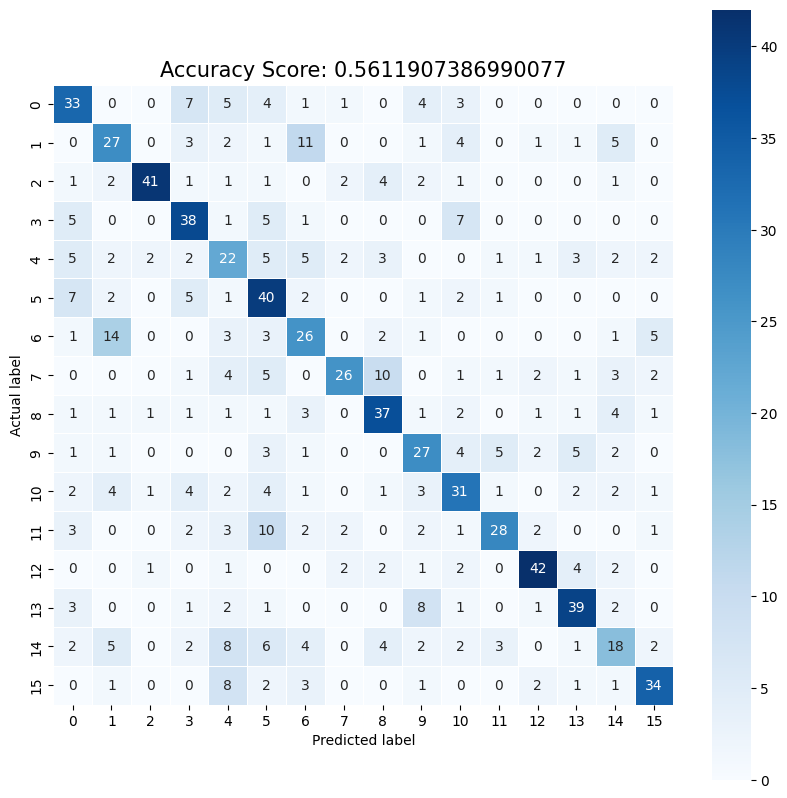

Train:
Accuracy Score: 0.8546130030959752
Recall score: 0.854724743089263
Precision score: 0.8604555985250943
F1 score: 0.8557380722824571


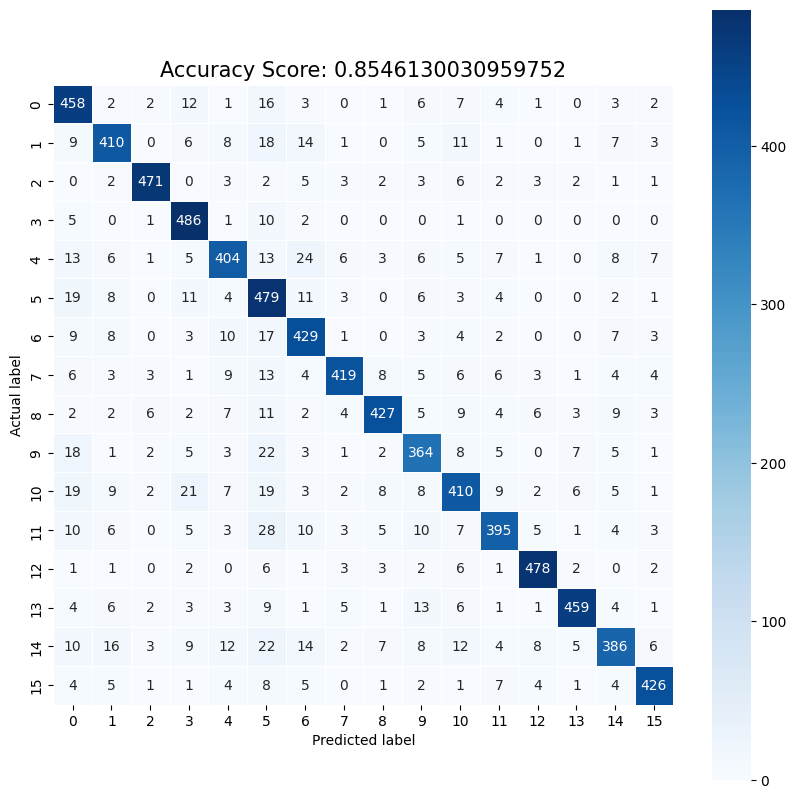

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


y_pred = xgb_model2.predict(X_val)

print('Validate:')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred, average="macro")}')
print(f"Precision score: {precision_score(y_test,y_pred, average='macro')}")
print(f"F1 score: {f1_score(y_test,y_pred, average='macro')}")


# confusion matrix plot

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15)
plt.show()




y_pred = xgb_model2.predict(X_train)

print('Train:')
print(f'Accuracy Score: {accuracy_score(y_train,y_pred)}')
print(f'Recall score: {recall_score(y_train,y_pred, average="macro")}')
print(f"Precision score: {precision_score(y_train,y_pred, average='macro')}")
print(f"F1 score: {f1_score(y_train,y_pred, average='macro')}")

# confusion matrix plot

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_train,y_pred))
plt.title(all_sample_title, size = 15)
plt.show()



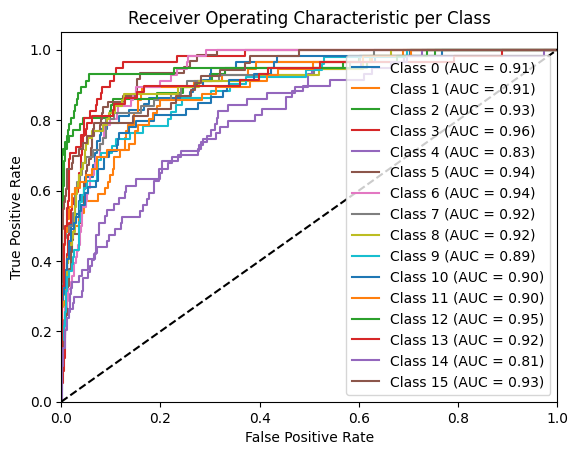

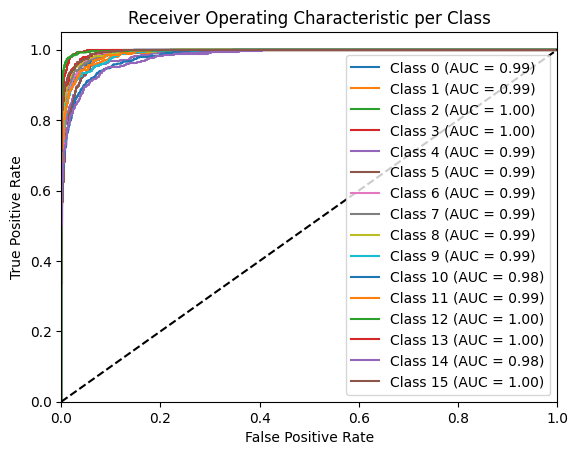

In [59]:

# calculate roc auc per class

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = xgb_model2.predict_proba(X_val)

y_test_bin = label_binarize(y_test, classes=[i for i in range(16)])

roc_auc_score(y_test_bin, y_pred, average='macro')

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic per Class')
plt.legend(loc="lower right")
plt.show()





# calculate roc auc per class



y_pred = xgb_model2.predict_proba(X_train)

y_train_bin = label_binarize(y_train, classes=[i for i in range(16)])

roc_auc_score(y_train_bin, y_pred, average='macro')

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_train_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic per Class')
plt.legend(loc="lower right")
plt.show()



